[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/CCS-ZCU/EuPaC_shared/blob/master/LIST_getting-started.ipynb)

This Jupyter notebook has been prepared for the EuPaC Hackathon and provides an easy way to start working with the LIST dataset — no need to clone the entire repository or download additional data. It is fully compatible with cloud platforms like Google Colaboratory (click the badge above) and runs without requiring any specialized library installations.

As such, it is intended as a starting point for EuPaC participants, including those with minimal coding experience.

In [1]:
import os
import requests
import geopandas as gpd
import numpy as np

In [2]:
# (1) download the dataset file in the parquet file format directly from zenodo:
# (feel free to change the download location following the --output parameter)
# Create directory for data and subdirectories if not already existent
os.makedirs("data/large_data", exist_ok=True)

!curl https://zenodo.org/records/10473706/files/LIST_v1-2.parquet --output data/large_data/LIST_v1-2.parquet

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  104M  100  104M    0     0  5913k      0  0:00:18  0:00:18 --:--:-- 6337k


In [3]:
LIST = gpd.read_parquet("data/large_data/LIST_v1-2.parquet")

In [5]:
LIST.shape

(525870, 65)

In [6]:
LIST.head(5)

,LIST-ID,EDCS-ID,EDH-ID,trismegistos_uri,pleiades_id,transcription,inscription,clean_text_conservative,clean_text_interpretive_sentence,clean_text_interpretive_word,...,Longitude,Latitude,is_geotemporal,geometry,is_within_RE,urban_context,urban_context_city,urban_context_pop_est,type_of_inscription_auto,type_of_inscription_auto_prob
445463,445464,EDCS-24900077,HD056163,https://www.trismegistos.org/text/177366,570485,Q(uinto) Caecilio C(ai) f(ilio) Metelo / imper...,Q(uinto) Caecilio C(ai) f(ilio) Metel(l)o / im...,Q Caecilio C f Metelo imperatori Italici quei ...,Quinto Caecilio Cai filio Metelo imperatori It...,Quinto Caecilio Cai filio Metelo imperatori It...,...,22.841200,37.649800,True,POINT (22.8412 37.6498),True,rural,None,NaN,honorific inscription,1.0
445464,445465,EDCS-03700724,HD052964,https://www.trismegistos.org/text/121715,531064,Fortissimo et piis/simo Caesari d(omino) n(ost...,Fortissimo et Piis/simo Caesari d(omino) n(ost...,Fortissimo et piissimo Caesari d n Gal Val P F...,Fortissimo et piissimo Caesari domino nostro G...,Fortissimo et piissimo Caesari domino nostro G...,...,20.766800,39.451200,True,POINT (20.7668 39.4512),True,rural,None,NaN,honorific inscription,1.0
445465,445466,EDCS-13800065,HD017714,https://www.trismegistos.org/text/177100,570049,Italicei / quei Aegei negotiantur / P(ublium) ...,Italicei / quei Aegei negotiantur / P(ublium) ...,Italicei quei Aegei negotiantur P Rutilium P f...,Italicei quei Aegei negotiantur Publium Rutili...,Italicei quei Aegei negotiantur Publium Rutili...,...,22.084500,38.248700,True,POINT (22.0845 38.2487),True,small,Aegium,1000.0,votive inscription,1.0
445466,445467,EDCS-03300852,HD051000,https://www.trismegistos.org/text/177273,240855,[Imp(eratori) Caes(ari) M(arco)] / An[nio] Flo...,Imp(eratori) / Floriano / P(io) F(elici) Aug(u...,An Floriano P F Aug p p m p III Imp Caes M Aur...,Imperatori Caesari Marco Annio Floriano Pio Fe...,Imperatori Caesari Marco Annio Floriano Pio Fe...,...,22.417100,37.431900,True,POINT (22.4171 37.4319),True,large,Tegea,46362.0,mile-/leaguestone,1.0
445467,445468,EDCS-28500283,HD021396,https://www.trismegistos.org/text/177131,,T[i(berius)] Claudius Caesar Aug(ustus) / G[er...,T[(iberius)] Claudius Caesar Aug(ustus) / G[er...,T Claudius Caesar Aug Ganicus pontif max trib ...,Tiberius Claudius Caesar Augustus Germanicus p...,Tiberius Claudius Caesar Augustus Germanicus p...,...,22.420877,37.454501,True,POINT (22.42088 37.4545),True,large,Tegea,46362.0,public legal inscription,1.0


<Axes: >

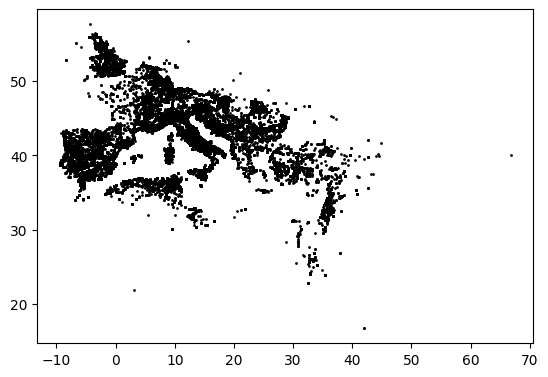

In [12]:
# spatial explorations
LIST[LIST["is_geotemporal"]].plot(color="black", markersize=1)

In [13]:
# textual explorations
LIST_texts = LIST["clean_text_interpretive_word"].tolist()
LIST_texts[:10]


['Quinto Caecilio Cai filio Metelo imperatori Italici quei Argeis negotiantur',
 'Fortissimo et piissimo Caesari domino nostro Galerio Valerio Maximiano Pio Felici Invicto Coranius Titianus vir perfectissimus praeses provinciae veteris Epiri numini eorum dicatissimus',
 'Italicei quei Aegei negotiantur Publium Rutilium Publi filium Nudum quaestorem',
 'Imperatori Caesari Marco Annio Floriano Pio Felici Augusto patri patriae milia passuum III Imperatori Caesari Marco Aurelio Probo Pio Felici Augusto milia passuum II',
 'Tiberius Claudius Caesar Augustus Germanicus pontifex maximus tribunicia potestate VIIII imperator XVI pater patriae dicit cum et colonias et municipia non solum Italiae verum etiam provinciarum item civitatium cuius que provinciae lebare oneribus vehiculorum praebendorum saepe temptavissem et cum satis multa remedia invenisse mihi viderer potuit tamen nequitiae hominum C RAS RVM aut falsa nomina ius dedit turo ante diem',
 'Pro salute Imperatorum Caesaris Luci Septimi S